In [1]:
# import the data set and do the data preprocessing

In [2]:
#Problem statement
#Develop a sentiment analysis model to classify reiviews as positive or negative. 
#Preprocess the review text using techniques such as lower casing, removing stop words and lematization
#use the trained model accurately predict the sentiment of new , unseen reviews.

In [3]:
import pandas as pd
data = pd.read_csv('Reviews.csv')
print(data)
data
#we can review the top 5 rows
data.head()
#Top 10 rows
data.head(10)
data.tail() # last 5 rows
data.info()
data.isnull().sum() 
data.duplicated()
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
combined_text = " ".join(data['Review']) #combine all review text into one string
wordcloud = WordCloud(width=800 ,height = 400 ,background_color = 'white').generate(combined_text)
#plot the word cloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()
from collections import Counter
targeted_words = ['good','great','amazing','bad']
all_words = " ".join(data['Review']).lower().split() #flatten reviews into a single list of words
word_counts = Counter(all_words)
target_word_count = {word: word_counts[word] for word in targeted_words}
#plotting
plt.figure(figsize=(8,6))
plt.bar(target_word_count.keys(), target_word_count.values(), color=['blue', 'green', 'orange','blue'])
plt.xlabel('Words')
plt.ylabel('Frequencey')
plt.title('Frequecey of specific words in reviwes')
plt.show()lowercased_text = data['Review'].str.lower()
print(lowercased_text)
#tokinization
from nltk.tokenize import word_tokenize
data['Tokens'] = data['Review'].apply(word_tokenize)
print(data['Tokens'])
data.info()
data['Review'].value_counts()
import string
data['Review'] = data['Review'].str.replace(f"[{string.punctuation}]"," ",regex = True)
print(data['Review'])
data['Review'].value_counts()
#Removing the stop words like this, is , are ,was 
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
data['Tokens'] = data['Review'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])
print(data['Tokens'])
#Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
stemmer = PorterStemmer()data['stemmed'] = data['Review'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
lemmatizer = WordNetLemmatizer()
data['Lemmatized'] = data['Review'].apply(lambda x :' '.join([lemmatizer.lemmatize(word , pos = wordnet.VERB) for word in word_tokenize(x)]))
print(data['Lemmatized'])
#Removing the numbers from reviews
import re
data['No_Numbers'] = data['Review'].apply(lambda x : re.sub(r'\d+',' ' ,x))
print(data['No_Numbers'])
#removing special characters like @ # %,*
data['cleaned'] = data['Review'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]','' ,x))
print(data['cleaned'])
pip install contractions
import contractions
data['Expanded'] = data['Review'].apply(contractions.fix)
print(data['Expanded'])
#Removing emojis
!pip install emoji
import emoji
data['emoji'] = data['Review'].apply(emoji.demojize)
print(data['emoji'])
!pip install beautifulsoup4
from bs4 import BeautifulSoup
data['cleaned'] = data['Review'].apply(lambda x: BeautifulSoup(x,"html.parser").get_text())
print(data['cleaned'])
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(data['Review'])
print(X.toarray())
#buidling machine  learning model
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(data['Review'])
y=data['Liked']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train,X_test,y_train,y_test)
model=MultinomialNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)
print(f'Accuracy:{accuracy}')
print('Classification Report:')
print(report)
#predict sentiment of new reviews
import re
import string


def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    
    # Remove punctuation using regular expressions
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    
    # Remove extra whitespaces
    text = " ".join(text.split())
    
    return text
def predict_sentiment(new_review):
    cleaned_review=preprocess_text(new_review)
    X_new=vectorizer.transform([cleaned_review])
    return model.predict(X_new)[0]
new_reviews=[
    "This restaurant has the best food.",
    "I will never cone here again.Terribke service."  
]
for review in new_reviews:
    sentiment=predict_sentiment(review)
    sentiment_label="positive" if sentiment==1 else 'Negative'
    print(f"Review:'{review}'\nPredicted Sentiment:{sentiment_label}\n")

In [4]:
data = pd.read_csv('Reviews.csv')

In [5]:
print(data)

                                                Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


In [6]:
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [7]:
#we can review the top 5 rows
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [8]:
#Top 10 rows
data.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [9]:
data.tail() # last 5 rows

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [10]:
data.tail(10)

,Review,Liked
990,The refried beans that came with my meal were ...,0
991,Spend your money and time some place else.,0
992,A lady at the table next to us found a live gr...,0
993,the presentation of the food was awful.,0
994,I can't tell you how disappointed I was.,0
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [11]:
data.info() # data set info like data types, entries of data set, memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [12]:
data.isnull().sum() # checking the null values.

Review    0
Liked     0
dtype: int64

In [13]:
data.duplicated() # checking the duplicated values

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
from wordcloud import WordCloud

In [16]:
combined_text = " ".join(data['Review']) #combine all review text into one string

In [17]:
wordcloud = WordCloud(width=800 ,height = 400 ,background_color = 'white').generate(combined_text)

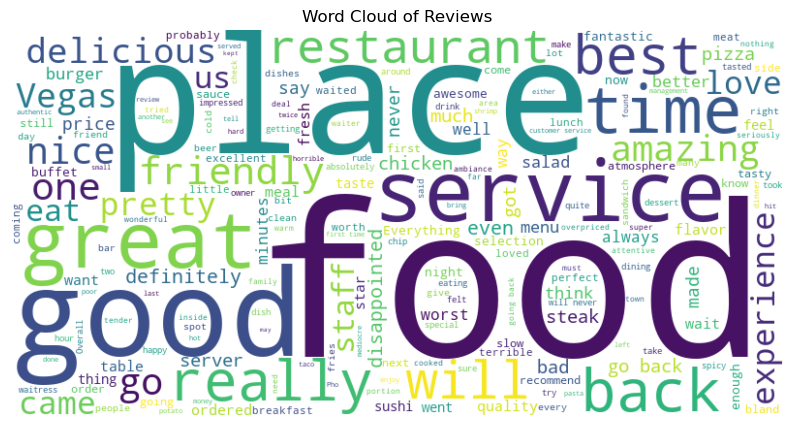

In [18]:
#plot the word cloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

In [19]:
from collections import Counter

In [20]:
targeted_words = ['good','great','amazing','bad']
all_words = " ".join(data['Review']).lower().split() #flatten reviews into a single list of words
word_counts = Counter(all_words)
target_word_count = {word: word_counts[word] for word in targeted_words}


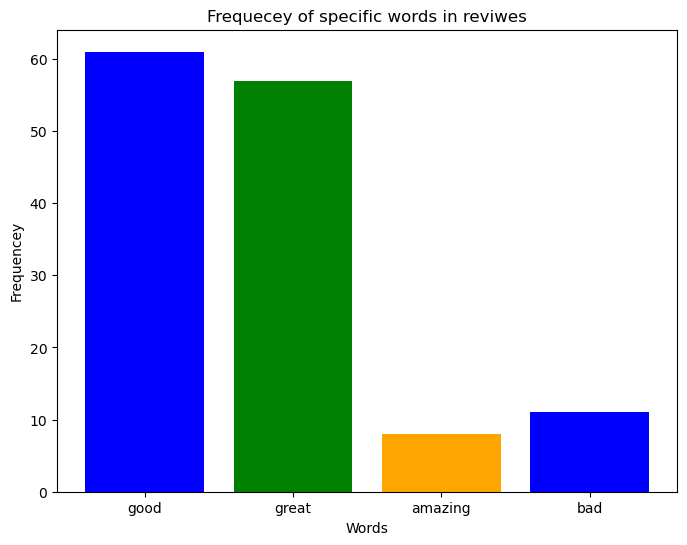

In [21]:
#plotting
plt.figure(figsize=(8,6))
plt.bar(target_word_count.keys(), target_word_count.values(), color=['blue', 'green', 'orange','blue'])
plt.xlabel('Words')
plt.ylabel('Frequencey')
plt.title('Frequecey of specific words in reviwes')
plt.show()

#Text preprocessing

In [22]:
lowercased_text = data['Review'].str.lower()
print(lowercased_text)

0                               wow... loved this place.
1                                     crust is not good.
2              not tasty and the texture was just nasty.
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
                             ...                        
995    i think food should have flavor and texture an...
996                             appetite instantly gone.
997    overall i was not impressed and would not go b...
998    the whole experience was underwhelming, and i ...
999    then, as if i hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object


In [23]:
#tokinization
from nltk.tokenize import word_tokenize

In [24]:
data['Tokens'] = data['Review'].apply(word_tokenize)

In [25]:
print(data['Tokens'])

0                      [Wow, ..., Loved, this, place, .]
1                              [Crust, is, not, good, .]
2      [Not, tasty, and, the, texture, was, just, nas...
3      [Stopped, by, during, the, late, May, bank, ho...
4      [The, selection, on, the, menu, was, great, an...
                             ...                        
995    [I, think, food, should, have, flavor, and, te...
996                       [Appetite, instantly, gone, .]
997    [Overall, I, was, not, impressed, and, would, ...
998    [The, whole, experience, was, underwhelming, ,...
999    [Then, ,, as, if, I, had, n't, wasted, enough,...
Name: Tokens, Length: 1000, dtype: object


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
 2   Tokens  1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [27]:
data['Review'].value_counts()

Review
#NAME?                                                                                                                                    4
The food was terrible.                                                                                                                    2
I would not recommend this place.                                                                                                         2
I love this place.                                                                                                                        2
I won't be back.                                                                                                                          2
                                                                                                                                         ..
OMG, the food was delicioso!                                                                                                              1
There is noth

In [28]:
import string

In [29]:
data['Review'] = data['Review'].str.replace(f"[{string.punctuation}]"," ",regex = True)

In [30]:
print(data['Review'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: Review, Length: 1000, dtype: object


In [31]:
data['Review'].value_counts()

Review
 NAME                                                                                                                                     4
I would not recommend this place                                                                                                          2
I love this place                                                                                                                         2
I won t be back                                                                                                                           2
Will not be back                                                                                                                          2
                                                                                                                                         ..
The burger    I got the  Gold Standard  a  17 burger and was kind of disappointed                                                         1
OMG  the food

In [32]:
#Removing the stop words like this, is , are ,was 
from nltk.corpus import stopwords

In [33]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shrut\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
stop_words = set(stopwords.words('english'))

In [35]:
data['Tokens'] = data['Review'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])

In [36]:
print(data['Tokens'])

0                                    [Wow, Loved, place]
1                                          [Crust, good]
2                           [Not, tasty, texture, nasty]
3      [Stopped, late, May, bank, holiday, Rick, Stev...
4                  [The, selection, menu, great, prices]
                             ...                        
995           [I, think, food, flavor, texture, lacking]
996                          [Appetite, instantly, gone]
997             [Overall, I, impressed, would, go, back]
998    [The, whole, experience, underwhelming, I, thi...
999    [Then, I, wasted, enough, life, poured, salt, ...
Name: Tokens, Length: 1000, dtype: object


In [37]:
#stemming
#stemming is the process of reducing the a word into root or base word form by removig suffix 
#example : driving stemmed is drive

In [38]:
#Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [39]:
stemmer = PorterStemmer()

In [40]:
data['stemmed'] = data['Review'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))

In [41]:
print(data['stemmed'])

0                                     wow love thi place
1                                      crust is not good
2                 not tasti and the textur wa just nasti
3      stop by dure the late may bank holiday off ric...
4      the select on the menu wa great and so were th...
                             ...                        
995    i think food should have flavor and textur and...
996                               appetit instantli gone
997        overal i wa not impress and would not go back
998    the whole experi wa underwhelm and i think we ...
999    then as if i hadn t wast enough of my life the...
Name: stemmed, Length: 1000, dtype: object


In [42]:
#Lemmatization
#Lemmatization is the process transforming a word into its base or dictionary form
#example is better is lemmtized to good 

In [43]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shrut\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [44]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

In [45]:
lemmatizer = WordNetLemmatizer()
data['Lemmatized'] = data['Review'].apply(lambda x :' '.join([lemmatizer.lemmatize(word , pos = wordnet.VERB) for word in word_tokenize(x)]))
print(data['Lemmatized'])
#Removing the numbers from reviews
import re
data['No_Numbers'] = data['Review'].apply(lambda x : re.sub(r'\d+',' ' ,x))
print(data['No_Numbers'])
#removing special characters like @ # %,*
data['cleaned'] = data['Review'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]','' ,x))
print(data['cleaned'])
pip install contractions
import contractions
data['Expanded'] = data['Review'].apply(contractions.fix)
print(data['Expanded'])
#Removing emojis
!pip install emoji
import emoji
data['emoji'] = data['Review'].apply(emoji.demojize)
print(data['emoji'])
!pip install beautifulsoup4
from bs4 import BeautifulSoup
data['cleaned'] = data['Review'].apply(lambda x: BeautifulSoup(x,"html.parser").get_text())
print(data['cleaned'])
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(data['Review'])
print(X.toarray())
#buidling machine  learning model
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(data['Review'])
y=data['Liked']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train,X_test,y_train,y_test)
model=MultinomialNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)
print(f'Accuracy:{accuracy}')
print('Classification Report:')
print(report)
#predict sentiment of new reviews
import re
import string


def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    
    # Remove punctuation using regular expressions
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    
    # Remove extra whitespaces
    text = " ".join(text.split())
    
    return text
def predict_sentiment(new_review):
    cleaned_review=preprocess_text(new_review)
    X_new=vectorizer.transform([cleaned_review])
    return model.predict(X_new)[0]
new_reviews=[
    "This restaurant has the best food.",
    "I will never cone here again.Terribke service."  
]
for review in new_reviews:
    sentiment=predict_sentiment(review)
    sentiment_label="positive" if sentiment==1 else 'Negative'
    print(f"Review:'{review}'\nPredicted Sentiment:{sentiment_label}\n")

In [46]:
data['Lemmatized'] = data['Review'].apply(lambda x :' '.join([lemmatizer.lemmatize(word , pos = wordnet.VERB) for word in word_tokenize(x)]))

In [47]:
print(data['Lemmatized'])

0                                   Wow Loved this place
1                                      Crust be not good
2                Not tasty and the texture be just nasty
3      Stopped by during the late May bank holiday of...
4      The selection on the menu be great and so be t...
                             ...                        
995    I think food should have flavor and texture an...
996                                Appetite instantly go
997       Overall I be not impress and would not go back
998    The whole experience be underwhelming and I th...
999    Then as if I hadn t waste enough of my life th...
Name: Lemmatized, Length: 1000, dtype: object


In [48]:
#Removing the numbers from reviews
import re
data['No_Numbers'] = data['Review'].apply(lambda x : re.sub(r'\d+',' ' ,x))

In [49]:
print(data['No_Numbers'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: No_Numbers, Length: 1000, dtype: object


In [50]:
#removing special characters like @ # %,*
data['cleaned'] = data['Review'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]','' ,x))

In [51]:
print(data['cleaned'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: cleaned, Length: 1000, dtype: object


In [52]:
#expanding method
# don't eat food in this hotel , when we apply expanted text it will convert into do not eat food in this hotel

In [53]:
pip install contractions


Note: you may need to restart the kernel to use updated packages.


In [54]:
import contractions
data['Expanded'] = data['Review'].apply(contractions.fix)


In [55]:
print(data['Expanded'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: Expanded, Length: 1000, dtype: object


In [56]:
#Removing emojis
!pip install emoji

In [57]:
import emoji
data['emoji'] = data['Review'].apply(emoji.demojize)

In [58]:
print(data['emoji'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: emoji, Length: 1000, dtype: object


In [59]:
# removing liks from review_ text
# food is good vist www.abchotel.in

In [60]:
!pip install beautifulsoup4


In [61]:
from bs4 import BeautifulSoup

In [62]:
data['cleaned'] = data['Review'].apply(lambda x: BeautifulSoup(x,"html.parser").get_text())

In [63]:
print(data['cleaned'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: cleaned, Length: 1000, dtype: object


In [64]:
#Tf-IDF vectorizer
#TF-term frequency,IDF-Inverse document Frequency

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [66]:
vectorizer=TfidfVectorizer()

In [67]:
X=vectorizer.fit_transform(data['Review'])

In [68]:
print(X.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [69]:
#buidling machine  learning model
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report

In [70]:
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(data['Review'])
y=data['Liked']

In [71]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [72]:
print(X_train,X_test,y_train,y_test)

  (0, 1527)	0.578582388550776
  (0, 1516)	0.5587881819736206
  (0, 2005)	0.45560954528848707
  (0, 1938)	0.20794801889277578
  (0, 1778)	0.3196494189359375
  (1, 711)	0.4193390530637025
  (1, 622)	0.4193390530637025
  (1, 1180)	0.3554925882290983
  (1, 613)	0.32026666852400937
  (1, 1471)	0.272554926639921
  (1, 62)	0.5164170315313602
  (1, 263)	0.27998403419950374
  (2, 1057)	0.5102287539842273
  (2, 1962)	0.48790050997574835
  (2, 699)	0.3031291394604372
  (2, 1618)	0.5102287539842273
  (2, 1571)	0.3198299691276987
  (2, 1938)	0.21704341786509082
  (3, 1723)	0.4538927163856403
  (3, 1852)	0.42838721919777234
  (3, 719)	0.30305480231081033
  (3, 1791)	0.3192733609259723
  (3, 821)	0.37508854376741335
  (3, 590)	0.33614831815132157
  (3, 1471)	0.29501353406759745
  :	:
  (797, 1796)	0.2155139089210878
  (798, 649)	0.34296597014320795
  (798, 787)	0.34296597014320795
  (798, 17)	0.34296597014320795
  (798, 406)	0.32369375609078
  (798, 18)	0.34296597014320795
  (798, 122)	0.342965970143

In [73]:
model=MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [74]:
y_pred=model.predict(X_test)

In [75]:
accuracy=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)

In [76]:
print(f'Accuracy:{accuracy}')
print('Classification Report:')
print(report)

Accuracy:0.8
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        96
           1       0.85      0.75      0.80       104

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.81      0.80      0.80       200



In [83]:
#predict sentiment of new reviews
import re
import string


def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    
    # Remove punctuation using regular expressions
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    
    # Remove extra whitespaces
    text = " ".join(text.split())
    
    return text
def predict_sentiment(new_review):
    cleaned_review=preprocess_text(new_review)
    X_new=vectorizer.transform([cleaned_review])
    return model.predict(X_new)[0]

In [84]:
new_reviews=[
    "This restaurant has the best food.",
    "I will never cone here again.Terribke service."  
]

In [86]:
for review in new_reviews:
    sentiment=predict_sentiment(review)
    sentiment_label="positive" if sentiment==1 else 'Negative'
    print(f"Review:'{review}'\nPredicted Sentiment:{sentiment_label}\n")

Review:'This restaurant has the best food.'
Predicted Sentiment:positive

Review:'I will never cone here again.Terribke service.'
Predicted Sentiment:Negative

